## TALLER REGRESIÓN LINEAL

Andres Useche - Rafael Torregroza

In [25]:
install.packages("corrplot")
install.packages("lmtest")
install.packages("MASS")
install.packages("leaps")
install.packages("ggplot2")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [26]:
library(corrplot)
library(lmtest)
library(MASS)
library(leaps)
library(ggplot2)

In [27]:
DF<-read.csv("/content/PBP_Datos consolidados.csv", header=TRUE, sep=";", dec=",")

str(DF)

'data.frame':	500 obs. of  6 variables:
 $ ID.Cliente     : int  43 137 257 477 754 825 1180 1718 1809 1929 ...
 $ Ganancia       : num  634 380 407 382 331 ...
 $ Presentacion   : int  1 0 1 1 1 1 1 1 0 0 ...
 $ Edad           : int  37 37 39 36 31 31 39 37 40 38 ...
 $ Genero         : chr  "M" "M" "M" "M" ...
 $ Ingreso_Mensual: num  3905 4666 4745 3815 3917 ...


In [28]:
# Convertir 'Genero' en factor y asignar 0 para "M" y 1 para "F"
DF$Genero_codificado <- as.numeric(factor(DF$Genero, levels = c("M", "F")))

# Ver el resultado
head(DF)


,ID.Cliente,Ganancia,Presentacion,Edad,Genero,Ingreso_Mensual,Genero_codificado
,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>
1,43,633.90,1,37,M,3905.48,1
2,137,380.37,0,37,M,4665.64,1
3,257,406.61,1,39,M,4744.88,1
4,477,382.20,1,36,M,3815.35,1
5,754,331.25,1,31,M,3916.61,1
6,825,456.01,1,31,M,3211.30,1


In [29]:
# Eliminamos las columas ID.Cliente y Genero
DF_Mod <- DF[, -c(1, 5)]

# Ver el resultado
head(DF_Mod)


,Ganancia,Presentacion,Edad,Ingreso_Mensual,Genero_codificado
,<dbl>,<int>,<int>,<dbl>,<dbl>
1,633.90,1,37,3905.48,1
2,380.37,0,37,4665.64,1
3,406.61,1,39,4744.88,1
4,382.20,1,36,3815.35,1
5,331.25,1,31,3916.61,1
6,456.01,1,31,3211.30,1


In [30]:
set.seed(920203) #se deja alguna semilla para que el muestreo sea replicable
#aquí se define el tamaño de la muestra, en este caso entrenamiento tendrá el 80% de los casos
sample <- sample.int(nrow(DF_Mod), floor(.8*nrow(DF_Mod)))
DF_Mod.train <- DF_Mod[sample, ]
DF_Mod.test <- DF_Mod[-sample, ]

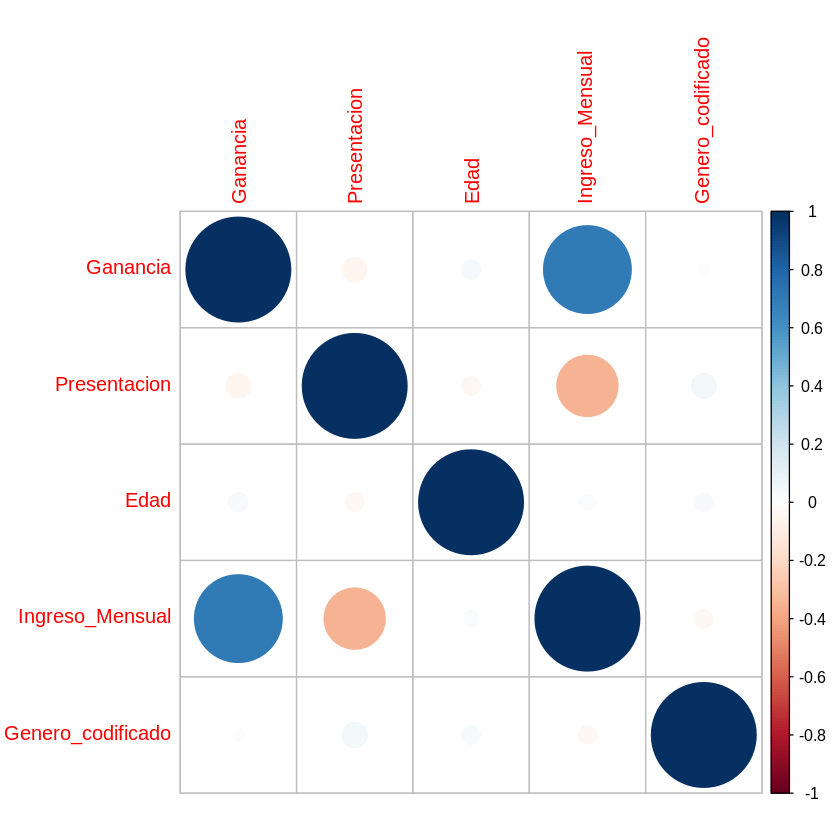

In [31]:
matrizcor<-cor(DF_Mod)
corrplot(matrizcor)

#Las variables Ingreso_mensual y Ganancia tienen una correlación directa alta y las variables Presentación y Ingreso_mensual son
#son inversamente correlacionales

In [32]:

# un modelo con todas las variables (preespecificado)
modelo1<- lm(Ganancia ~.,data=DF_Mod.train)

In [33]:
summary(DF_Mod)

    Ganancia        Presentacion        Edad       Ingreso_Mensual
 Min.   :  72.72   Min.   :0.000   Min.   :30.00   Min.   : 2063  
 1st Qu.: 397.54   1st Qu.:0.000   1st Qu.:34.00   1st Qu.: 3992  
 Median : 527.18   Median :0.000   Median :38.00   Median : 4935  
 Mean   : 577.70   Mean   :0.466   Mean   :37.84   Mean   : 5179  
 3rd Qu.: 708.38   3rd Qu.:1.000   3rd Qu.:42.00   3rd Qu.: 6070  
 Max.   :1870.01   Max.   :1.000   Max.   :45.00   Max.   :13230  
 Genero_codificado
 Min.   :1.00     
 1st Qu.:1.00     
 Median :2.00     
 Mean   :1.51     
 3rd Qu.:2.00     
 Max.   :2.00     

In [34]:
summary(modelo1)


Call:
lm(formula = Ganancia ~ ., data = DF_Mod.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-643.28 -114.90  -21.39  108.07  801.11 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.509e+02  9.426e+01  -1.601    0.110    
Presentacion       1.087e+02  1.973e+01   5.511 6.45e-08 ***
Edad               9.140e-01  2.209e+00   0.414    0.679    
Ingreso_Mensual    1.267e-01  5.841e-03  21.696  < 2e-16 ***
Genero_codificado -4.110e+00  1.846e+01  -0.223    0.824    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 183.9 on 395 degrees of freedom
Multiple R-squared:  0.5473,	Adjusted R-squared:  0.5427 
F-statistic: 119.4 on 4 and 395 DF,  p-value: < 2.2e-16


In [35]:
modelostep<-step(modelo1,direction="both")

Start:  AIC=4176.48
Ganancia ~ Presentacion + Edad + Ingreso_Mensual + Genero_codificado

                    Df Sum of Sq      RSS    AIC
- Genero_codificado  1      1677 13360340 4174.5
- Edad               1      5792 13364455 4174.7
<none>                           13358663 4176.5
- Presentacion       1   1027124 14385787 4204.1
- Ingreso_Mensual    1  15918984 29277646 4488.3

Step:  AIC=4174.53
Ganancia ~ Presentacion + Edad + Ingreso_Mensual

                    Df Sum of Sq      RSS    AIC
- Edad               1      5595 13365934 4172.7
<none>                           13360340 4174.5
+ Genero_codificado  1      1677 13358663 4176.5
- Presentacion       1   1025494 14385834 4202.1
- Ingreso_Mensual    1  15956402 29316742 4486.9

Step:  AIC=4172.7
Ganancia ~ Presentacion + Ingreso_Mensual

                    Df Sum of Sq      RSS    AIC
<none>                           13365934 4172.7
+ Edad               1      5595 13360340 4174.5
+ Genero_codificado  1      1480 13364455 4

El mejor modelo tomando como metrica el AIC, es el que tiene las variables independientes Presentación y ingreso mensual

In [36]:
summary(modelostep)


Call:
lm(formula = Ganancia ~ Presentacion + Ingreso_Mensual, data = DF_Mod.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-641.46 -116.69  -23.96  107.47  799.07 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.227e+02  3.588e+01  -3.420 0.000691 ***
Presentacion     1.081e+02  1.964e+01   5.506 6.62e-08 ***
Ingreso_Mensual  1.268e-01  5.823e-03  21.780  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 183.5 on 397 degrees of freedom
Multiple R-squared:  0.547,	Adjusted R-squared:  0.5447 
F-statistic: 239.7 on 2 and 397 DF,  p-value: < 2.2e-16


In [37]:
#Intervalos de confianza
confint(modelostep, level=0.95)

,2.5 %,97.5 %
(Intercept),-193.217146,-52.1589995
Presentacion,69.512097,146.7283123
Ingreso_Mensual,0.115377,0.1382724


El modelo tiene un R al cuadrado de 0.547, es decir que que la variable dependiente Ganancia, explica el 54.7% del modelo, el R a la dos ajustado es practicamente el mismo, es decir que no se sobreentrena el modelo

H0: B1=0 H1:B1 diferente de 0
p<alpha Por lo tanto se rechaza H0, es decir que que las varibles presentación y Ingreso_Mensual si influyese sobre las ganancias, el estadistico F, es alto, lo cual apoya lo anteriormente mencionado

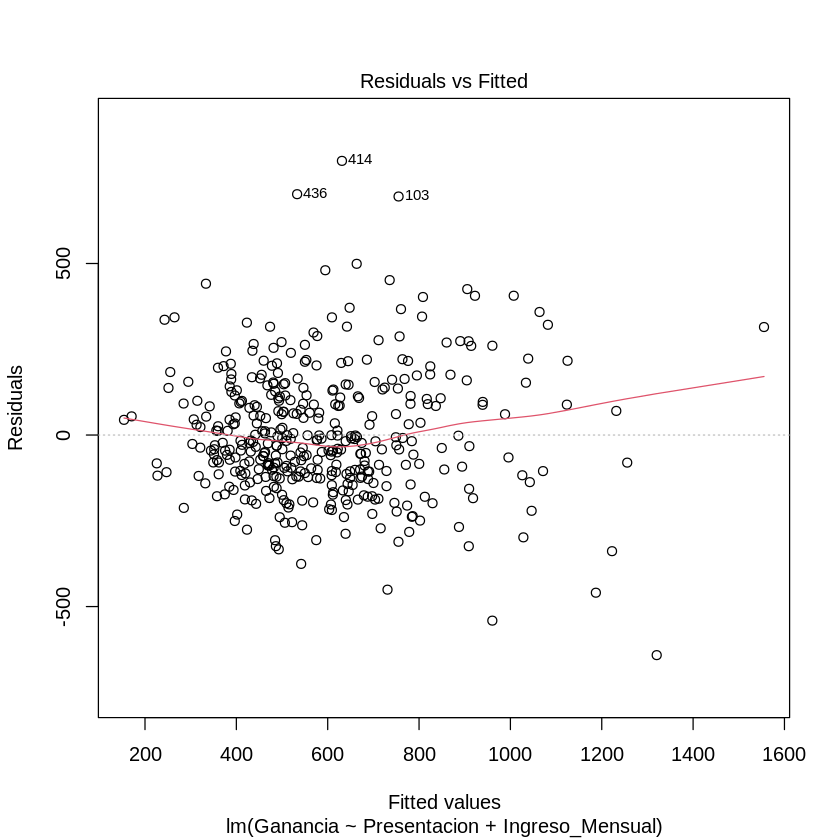

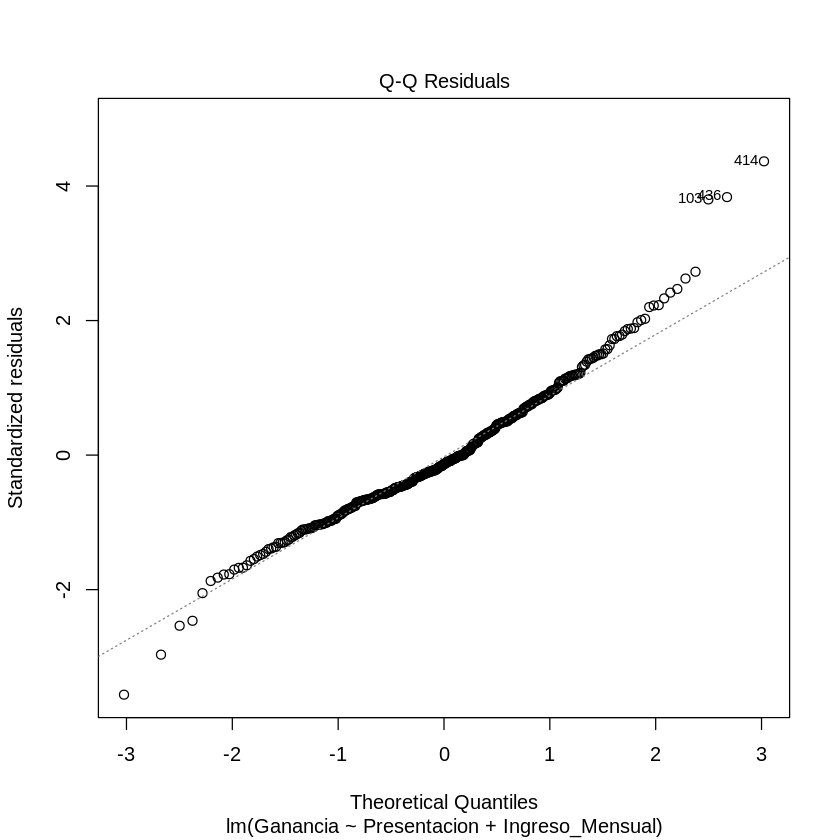

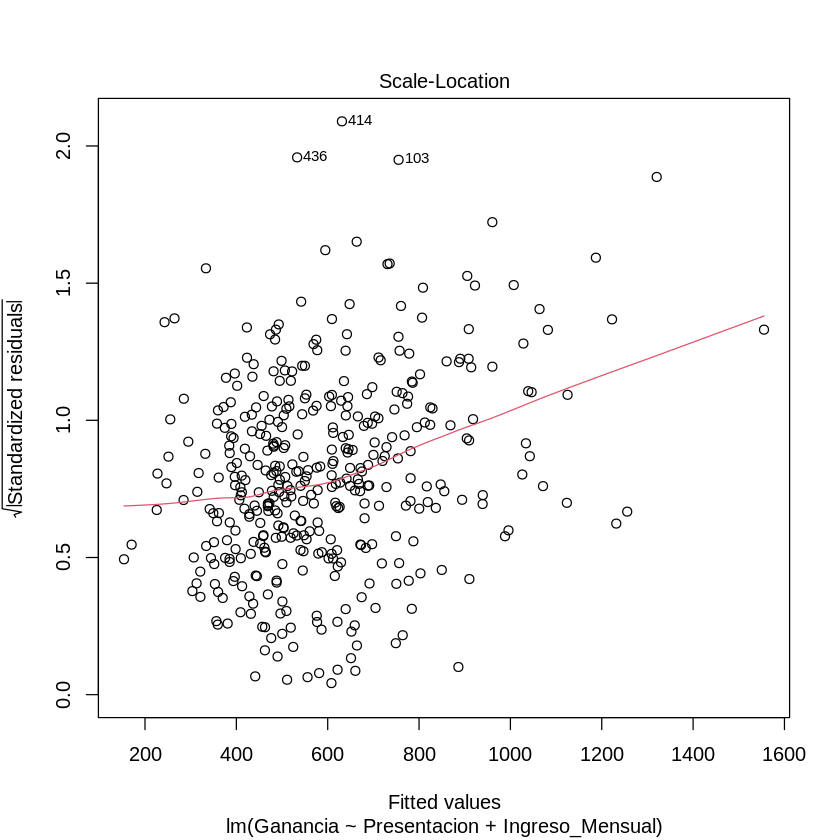

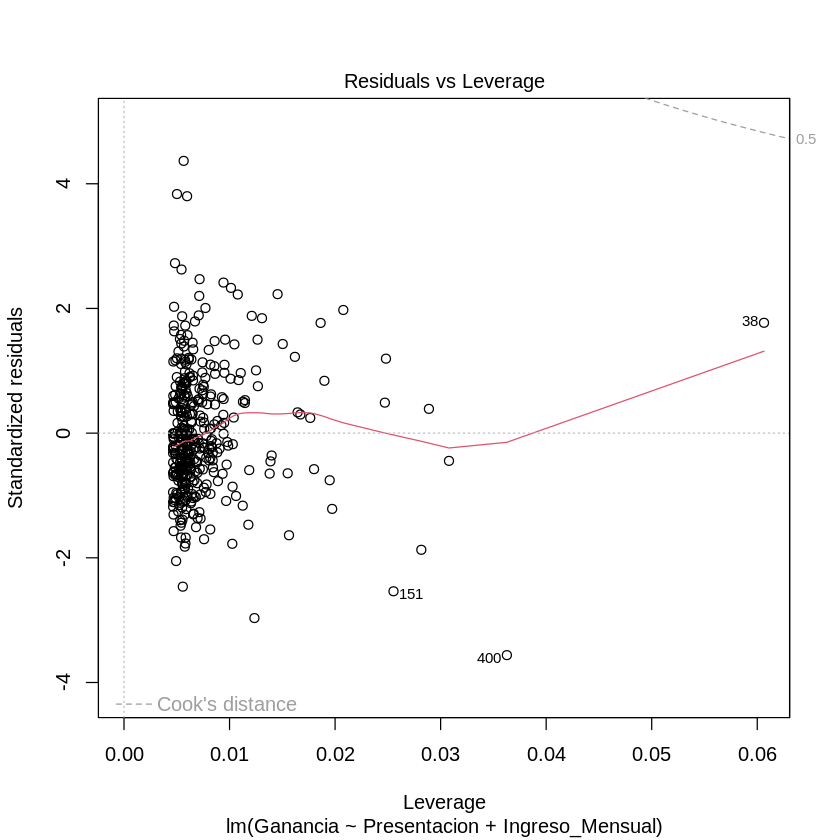

In [38]:
plot(modelostep)

In [ ]:
library(lmtest)
bptest(modelostep)

#p<alpha, no se cumple el supuesto de que las varianzas son constantes. Vamos a omitir este resultado para seguir con el ejercicio


	studentized Breusch-Pagan test

data:  modelostep
BP = 26.273, df = 2, p-value = 1.972e-06


In [39]:
# Prueba de autocorrelación de residuos de Durbin-Watson
dwtest(modelostep)

#p>alpha por lo tanto los residuos no estan autocorrelacionados


	Durbin-Watson test

data:  modelostep
DW = 2.012, p-value = 0.5467
alternative hypothesis: true autocorrelation is greater than 0


       0        1 
5774.049 4595.622 


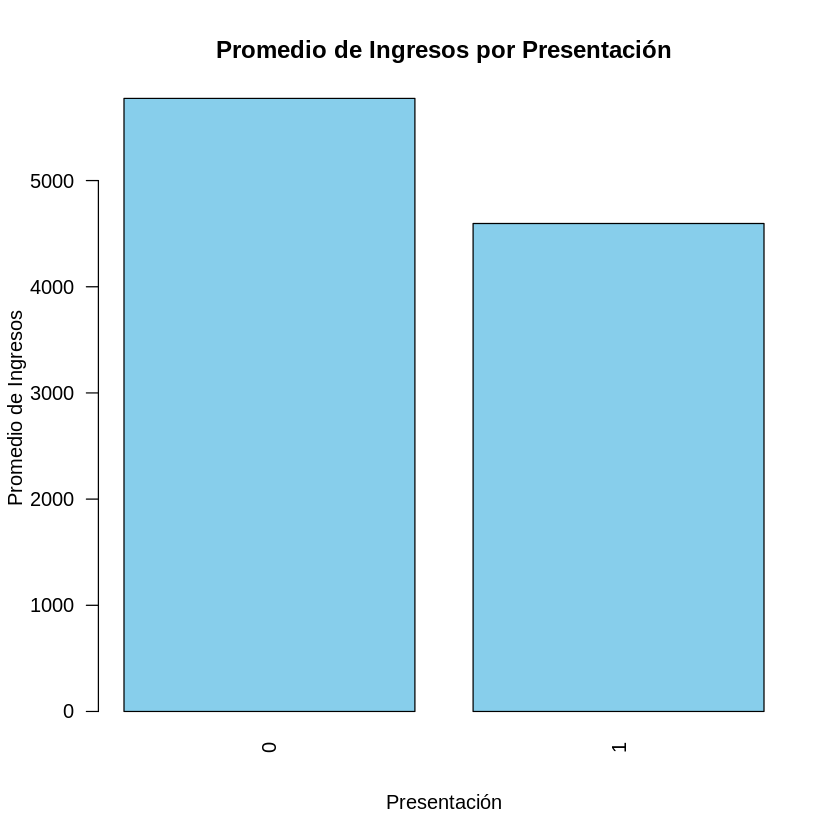

In [ ]:
# Calcular promedios
promedios <- tapply(DF_Mod.train$Ingreso_Mensual, DF_Mod.train$Presentacion, mean)

# Graficar
barplot(promedios, col = "skyblue", border = "black",
        main = "Promedio de Ingresos por Presentación",
        xlab = "Presentación", ylab = "Promedio de Ingresos", las = 2)

print(promedios)


CONCLUSIÓN: Después de analizar el modelo, se evidencia que las variables más relevantes para predecir las ganancias son ‘Presentación’ e ‘Ingreso_Mensual’. Al graficarlas, se observa que las personas que asistieron a la presentación tienen, en promedio, ingresos más bajos que aquellas que no lo hicieron. Esto sugiere que los clientes con mayores ingresos no están tan interesados en la presentación. Como consecuencia, el banco obtuvo menores beneficios cuando Isabelle realizó las presentaciones, ya que los clientes con menores ingresos tienen una menor capacidad de aportar financieramente al banco.